In [ ]:

# To upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshikutty","key":"18db70790316a26eb1a34aa1e79a33a1"}'}

In [ ]:
!mkdir ~/.kaggle

# Changing the prath to the .kaggle folder
!cp kaggle.json ~/.kaggle/
#  Changing the permissions to perform read and write access
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to Download the dogs-vs-cats dataset
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:25<00:00, 36.9MB/s]
100% 812M/812M [00:25<00:00, 33.6MB/s]


In [ ]:
# Unzipping dogs-vs-cats dataset file
!unzip -qq dogs-vs-cats.zip



In [ ]:
# Unzipping train sample
!unzip -qq train.zip

In [ ]:
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 38.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.1

In [ ]:
# to create the directories and assigning the subset of the cat and dog images for the traing validation and testing.
import os, shutil, pathlib

#shutil.rmtree("cats_vs_dogs_small")

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
#Building the Model.
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
#Running the summary of the model.
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [ ]:
# to Compile the model.
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
#to create the image datasets from directories for training, validation, and testing, each with specified image size and batch size.
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# to use the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convolutionnetwork_from_scratchmodel.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 18s 89ms/step - loss: 0.7058 - accuracy: 0.5005 - val_loss: 0.6924 - val_accuracy: 0.5030
Epoch 2/30
63/63 [==============================] - 6s 85ms/step - loss: 0.6906 - accuracy: 0.5260 - val_loss: 0.6867 - val_accuracy: 0.5740
Epoch 3/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6824 - accuracy: 0.5820 - val_loss: 0.6702 - val_accuracy: 0.5940
Epoch 4/30
63/63 [==============================] - 7s 110ms/step - loss: 0.6416 - accuracy: 0.6360 - val_loss: 0.7350 - val_accuracy: 0.5570
Epoch 5/30
63/63 [==============================] - 7s 105ms/step - loss: 0.6109 - accuracy: 0.6690 - val_loss: 0.6055 - val_accuracy: 0.6660
Epoch 6/30
63/63 [==============================] - 4s 59ms/step - loss: 0.5742 - accuracy: 0.6930 - val_loss: 0.6619 - val_accuracy: 0.6360
Epoch 7/30
63/63 [==============================] - 4s 60ms/step - loss: 0.5387 - accuracy: 0.7315 - val_loss: 0.6570 - val_accuracy: 0.6890
Epoch 8/30

In [ ]:
# To test the model
test_model = keras.models.load_model("convolutionnetwork_from_scratchmodel.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 40ms/step - loss: 0.5667 - accuracy: 0.7170
Test accuracy: 0.717


In [ ]:
# To declare the Data Augumentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
#Building the model and compiling it.
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
#Using the callback function to save the model checkpoint with the best validation loss and also training the model while monitoring the validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convolutionnetwork_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 11s 123ms/step - loss: 0.7032 - accuracy: 0.5160 - val_loss: 0.6924 - val_accuracy: 0.5140
Epoch 2/100
63/63 [==============================] - 5s 76ms/step - loss: 0.6939 - accuracy: 0.5160 - val_loss: 0.6926 - val_accuracy: 0.5240
Epoch 3/100
63/63 [==============================] - 4s 59ms/step - loss: 0.6990 - accuracy: 0.5170 - val_loss: 0.6895 - val_accuracy: 0.5640
Epoch 4/100
63/63 [==============================] - 5s 71ms/step - loss: 0.6885 - accuracy: 0.5660 - val_loss: 0.6814 - val_accuracy: 0.5730
Epoch 5/100
63/63 [==============================] - 6s 90ms/step - loss: 0.6700 - accuracy: 0.5945 - val_loss: 0.6612 - val_accuracy: 0.6110
Epoch 6/100
63/63 [==============================] - 4s 60ms/step - loss: 0.6523 - accuracy: 0.6090 - val_loss: 0.6443 - val_accuracy: 0.6100
Epoch 7/100
63/63 [==============================] - 5s 83ms/step - loss: 0.6414 - accuracy: 0.6400 - val_loss: 0.6273 - val_accuracy: 0.6500
Epoc

In [ ]:
#Testing the model accuracy.
test_model = keras.models.load_model(
    "convolutionnetwork_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 5s 65ms/step - loss: 0.4938 - accuracy: 0.8255
Test accuracy: 0.826


Question 2

In [ ]:
# Creating directories and assiging images to training, validation and test directories
# Increasing the training sample from 2000 to 3500
import os
import shutil
import pathlib

#shutil.rmtree("cats_vs_dogs_small_IncreasedTrainSample")
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_IncreasedTrainSample")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Training has 2000 samples, test has 1000 samples, and validation has 500 samples
make_subset("train", start_index=0, end_index=3500)
make_subset("validation", start_index=3500, end_index=4000)
make_subset("test", start_index=4000, end_index=5000)

In [ ]:
# Building the model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# to configure the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# to use the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convolutionnetwork_from_scratchmodel.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 83ms/step - loss: 0.6960 - accuracy: 0.5070 - val_loss: 0.6927 - val_accuracy: 0.5960
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6937 - accuracy: 0.5285 - val_loss: 0.6898 - val_accuracy: 0.5860
Epoch 3/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6792 - accuracy: 0.5640 - val_loss: 0.7675 - val_accuracy: 0.5180
Epoch 4/30
63/63 [==============================] - 6s 90ms/step - loss: 0.6332 - accuracy: 0.6655 - val_loss: 0.6505 - val_accuracy: 0.5940
Epoch 5/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6100 - accuracy: 0.6645 - val_loss: 0.6113 - val_accuracy: 0.6530
Epoch 6/30
63/63 [==============================] - 7s 104ms/step - loss: 0.5707 - accuracy: 0.7060 - val_loss: 0.5912 - val_accuracy: 0.6810
Epoch 7/30
63/63 [==============================] - 4s 60ms/step - loss: 0.5616 - accuracy: 0.7125 - val_loss: 0.6155 - val_accuracy: 0.6540
Epoch 8/30
6

In [ ]:
# to test the model
test_model = keras.models.load_model("convolutionnetwork_from_scratchmodel.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 45ms/step - loss: 0.6068 - accuracy: 0.6745
Test accuracy: 0.674


Question 3


In [ ]:
# Creating directories and assiging images to training, validation and test directories
# Increasing the training sample from 3500 to 4500
import os
import shutil
import pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_OptimalTrainSamples1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Training has 1500 samples, test has 1000 samples, and validation has 500 samples

make_subset("train", start_index=0, end_index=4500)
make_subset("validation", start_index=4500, end_index=5000)
make_subset("test", start_index=5000, end_index=6000)

In [ ]:
# Building the model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#  the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# to use the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convolutionnetwork_from_scratchmodel.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 61ms/step - loss: 0.7012 - accuracy: 0.5050 - val_loss: 0.6918 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6946 - accuracy: 0.5125 - val_loss: 0.6907 - val_accuracy: 0.5450
Epoch 3/30
63/63 [==============================] - 7s 103ms/step - loss: 0.6889 - accuracy: 0.5495 - val_loss: 0.6897 - val_accuracy: 0.5130
Epoch 4/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6690 - accuracy: 0.5885 - val_loss: 0.6599 - val_accuracy: 0.5730
Epoch 5/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6239 - accuracy: 0.6580 - val_loss: 0.6056 - val_accuracy: 0.6650
Epoch 6/30
63/63 [==============================] - 7s 95ms/step - loss: 0.5950 - accuracy: 0.6890 - val_loss: 0.6403 - val_accuracy: 0.6360
Epoch 7/30
63/63 [==============================] - 4s 60ms/step - loss: 0.5635 - accuracy: 0.7105 - val_loss: 0.5771 - val_accuracy: 0.7040
Epoch 8/30
6

In [ ]:
# to test the model
test_model = keras.models.load_model("convolutionnetwork_from_scratchmodel.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 35ms/step - loss: 0.5934 - accuracy: 0.7275
Test accuracy: 0.728


In [ ]:
# Creating directories and assiging images to training, validation and test directories
# Increasing the training sample from 4500 to 5500
import os
import shutil
import pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_OptimalTrainSamples1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Training has 1500 samples, test has 1000 samples, and validation has 500 samples

make_subset("train", start_index=0, end_index=5500)
make_subset("validation", start_index=5500, end_index=6000)
make_subset("test", start_index=6000, end_index=7000)

In [ ]:
# Building the model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#  the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# to use the callbacks function to monitor validation loss and running the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convolutionnetwork_from_scratchmodel.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 61ms/step - loss: 0.6984 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5700
Epoch 2/30
63/63 [==============================] - 7s 115ms/step - loss: 0.6947 - accuracy: 0.5300 - val_loss: 0.6908 - val_accuracy: 0.5150
Epoch 3/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6917 - accuracy: 0.5570 - val_loss: 0.6843 - val_accuracy: 0.5830
Epoch 4/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6713 - accuracy: 0.6010 - val_loss: 0.6371 - val_accuracy: 0.6250
Epoch 5/30
63/63 [==============================] - 6s 94ms/step - loss: 0.6225 - accuracy: 0.6465 - val_loss: 0.6623 - val_accuracy: 0.6130
Epoch 6/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5998 - accuracy: 0.6765 - val_loss: 0.6212 - val_accuracy: 0.6460
Epoch 7/30
63/63 [==============================] - 5s 68ms/step - loss: 0.5734 - accuracy: 0.6995 - val_loss: 0.5673 - val_accuracy: 0.7040
Epoch 8/30
6

In [ ]:
# to test the model
test_model = keras.models.load_model("convolutionnetwork_from_scratchmodel.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 40ms/step - loss: 0.5785 - accuracy: 0.7430
Test accuracy: 0.743


Question 4

Pretrained Network


In [ ]:
#creating the directories and assigning the subset of the cat and dog images for the traing validation and testing.
import os
import shutil
import pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Pretrained")

#shutil.rmtree("cats_vs_dogs_small_Pretrained")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
# Loading  the pretrained weights to VGG16 model.
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
#Extracting the VGG16 features and their corresponding labels.
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 28ms/step


In [ ]:
train_features.shape
test_features.shape

(2000, 5, 5, 512)

In [ ]:
#to build the model.
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionnetwork.keras",
      save_best_only=True,
      monitor="val_loss")
]

history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 2s 15ms/step - loss: 19.8091 - accuracy: 0.9205 - val_loss: 6.8328 - val_accuracy: 0.9620
Epoch 2/30
63/63 [==============================] - 1s 10ms/step - loss: 3.6683 - accuracy: 0.9740 - val_loss: 5.3254 - val_accuracy: 0.9630
Epoch 3/30
63/63 [==============================] - 1s 9ms/step - loss: 2.5225 - accuracy: 0.9815 - val_loss: 4.4000 - val_accuracy: 0.9720
Epoch 4/30
63/63 [==============================] - 0s 7ms/step - loss: 1.7612 - accuracy: 0.9870 - val_loss: 2.5104 - val_accuracy: 0.9810
Epoch 5/30
63/63 [==============================] - 0s 7ms/step - loss: 0.8017 - accuracy: 0.9940 - val_loss: 3.2055 - val_accuracy: 0.9770
Epoch 6/30
63/63 [==============================] - 0s 6ms/step - loss: 0.5556 - accuracy: 0.9940 - val_loss: 4.9154 - val_accuracy: 0.9690
Epoch 7/30
63/63 [==============================] - 0s 6ms/step - loss: 0.4183 - accuracy: 0.9945 - val_loss: 6.7348 - val_accuracy: 0.9710
Epoch 8/30
63/63 

In [ ]:
#to test the model
test_model = keras.models.load_model("feature_extractionnetwork.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 5.6168 - accuracy: 0.9715
Test accuracy: 0.971


In [ ]:
#to load the pre-trained weights to the VGG16 model
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False
# Freezing the layers of the pretrained CNN and printing the list of trainable weights.
conv_base.trainable = True
print("number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))
#UnFreezing the layers of the pretrained CNN and printing the list of trainable weights.
conv_base.trainable = False
print("number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

number of trainable weights before freezing the conv base: 26
number of trainable weights after freezing the conv base: 0


pre-trained model with data augmentation:

In [ ]:
#Adding a data augumentation stage.
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extractionnetwork_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
    ]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=60,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/60
63/63 [==============================] - 7s 74ms/step - loss: 18.6928 - accuracy: 0.9025 - val_loss: 15.1838 - val_accuracy: 0.9150
Epoch 2/60
63/63 [==============================] - 8s 116ms/step - loss: 7.3713 - accuracy: 0.9420 - val_loss: 6.2073 - val_accuracy: 0.9690
Epoch 3/60
63/63 [==============================] - 4s 67ms/step - loss: 6.0998 - accuracy: 0.9570 - val_loss: 6.2218 - val_accuracy: 0.9720
Epoch 4/60
63/63 [==============================] - 5s 70ms/step - loss: 5.2707 - accuracy: 0.9595 - val_loss: 4.6060 - val_accuracy: 0.9750
Epoch 5/60
63/63 [==============================] - 8s 112ms/step - loss: 4.6422 - accuracy: 0.9650 - val_loss: 6.3310 - val_accuracy: 0.9680
Epoch 6/60
63/63 [==============================] - 5s 67ms/step - loss: 4.1801 - accuracy: 0.9705 - val_loss: 6.5650 - val_accuracy: 0.9660
Epoch 7/60
63/63 [==============================] - 5s 70ms/step - loss: 3.2799 - accuracy: 0.9690 - val_loss: 3.8085 - val_accuracy: 0.9740
Epoch 8/6

In [ ]:
#to test the model accuracy.
test_model = keras.models.load_model(
    "feature_extractionnetwork_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 53ms/step - loss: 1.6289 - accuracy: 0.9795
Test accuracy: 0.979


3500 Sample Size for Pre_Trained Model

In [ ]:
#Increasing the pretrained training sample.
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_PretrainedIncreased_trainsample")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
make_subset("train", start_index=0, end_index=3500)
make_subset("validation", start_index=3500, end_index=4000)
make_subset("test", start_index=4000, end_index=5000)

In [ ]:
#to load pre-trained weights to the VGG16 model
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.trainable = False

In [ ]:
#to build the model.
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionnetwork3500.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 2s 11ms/step - loss: 14.4641 - accuracy: 0.9285 - val_loss: 9.4139 - val_accuracy: 0.9400
Epoch 2/30
63/63 [==============================] - 0s 7ms/step - loss: 5.1981 - accuracy: 0.9685 - val_loss: 4.6096 - val_accuracy: 0.9670
Epoch 3/30
63/63 [==============================] - 0s 7ms/step - loss: 0.8244 - accuracy: 0.9900 - val_loss: 5.1961 - val_accuracy: 0.9720
Epoch 4/30
63/63 [==============================] - 0s 7ms/step - loss: 1.2892 - accuracy: 0.9890 - val_loss: 7.7549 - val_accuracy: 0.9640
Epoch 5/30
63/63 [==============================] - 0s 6ms/step - loss: 1.5731 - accuracy: 0.9905 - val_loss: 3.8728 - val_accuracy: 0.9730
Epoch 6/30
63/63 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.9945 - val_loss: 5.7615 - val_accuracy: 0.9700
Epoch 7/30
63/63 [==============================] - 0s 7ms/step - loss: 0.4758 - accuracy: 0.9960 - val_loss: 5.9197 - val_accuracy: 0.9740
Epoch 8/30
63/63 [

In [ ]:
#to test the accuracy of the model.
test_model = keras.models.load_model("feature_extractionnetwork3500.keras")

test_loss, test1_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test1_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 5.3882 - accuracy: 0.9735
Test accuracy: 0.974


4500 Sample Size for Pre_Trained Model

In [ ]:
#creating the directories and assigning the subset of the cat and dog images for the traing validation and testing.
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Pretrained_optimal_trainsample")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
make_subset("train", start_index=0, end_index=4500)
make_subset("validation", start_index=4500, end_index=5000)
make_subset("test", start_index=5000, end_index=6000)

In [ ]:
#to load the pre-trained weights to the VGG16 model
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
#to build the model.
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionnetwork4500.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 1s 11ms/step - loss: 14.9457 - accuracy: 0.9275 - val_loss: 2.2906 - val_accuracy: 0.9750
Epoch 2/30
63/63 [==============================] - 0s 7ms/step - loss: 3.2042 - accuracy: 0.9770 - val_loss: 5.2615 - val_accuracy: 0.9670
Epoch 3/30
63/63 [==============================] - 1s 9ms/step - loss: 1.6613 - accuracy: 0.9870 - val_loss: 6.4300 - val_accuracy: 0.9700
Epoch 4/30
63/63 [==============================] - 0s 7ms/step - loss: 1.2133 - accuracy: 0.9905 - val_loss: 4.0209 - val_accuracy: 0.9780
Epoch 5/30
63/63 [==============================] - 0s 6ms/step - loss: 1.0237 - accuracy: 0.9900 - val_loss: 6.0484 - val_accuracy: 0.9680
Epoch 6/30
63/63 [==============================] - 0s 7ms/step - loss: 1.2145 - accuracy: 0.9930 - val_loss: 4.7777 - val_accuracy: 0.9770
Epoch 7/30
63/63 [==============================] - 0s 6ms/step - loss: 0.4275 - accuracy: 0.9940 - val_loss: 4.2021 - val_accuracy: 0.9780
Epoch 8/30
63/63 [

In [ ]:
#to test the accuracy of teh model.
test_model = keras.models.load_model(
    "feature_extractionnetwork4500.keras")
test_loss, test1_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test1_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 3.6258 - accuracy: 0.9730
Test accuracy: 0.973


5500 Sample Size for Pre_Trained Model

In [ ]:
#creating the directories and assigning the subset of the cat and dog images for the traing validation and testing.
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Pretrained_optimal_trainsample")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
make_subset("train", start_index=0, end_index=5500)
make_subset("validation", start_index=5500, end_index=6000)
make_subset("test", start_index=6000, end_index=7000)

In [ ]:
#to load the pre-trained weights to the VGG16 model
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
#to build the model.
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionnetwork5500.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 2s 15ms/step - loss: 19.9010 - accuracy: 0.9260 - val_loss: 8.3927 - val_accuracy: 0.9450
Epoch 2/30
63/63 [==============================] - 1s 8ms/step - loss: 5.0461 - accuracy: 0.9720 - val_loss: 5.8604 - val_accuracy: 0.9730
Epoch 3/30
63/63 [==============================] - 0s 8ms/step - loss: 1.5571 - accuracy: 0.9890 - val_loss: 5.7901 - val_accuracy: 0.9740
Epoch 4/30
63/63 [==============================] - 0s 6ms/step - loss: 1.7982 - accuracy: 0.9875 - val_loss: 6.4720 - val_accuracy: 0.9750
Epoch 5/30
63/63 [==============================] - 0s 7ms/step - loss: 1.3147 - accuracy: 0.9905 - val_loss: 6.9188 - val_accuracy: 0.9750
Epoch 6/30
63/63 [==============================] - 0s 8ms/step - loss: 0.1358 - accuracy: 0.9970 - val_loss: 4.6977 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 0s 7ms/step - loss: 0.5261 - accuracy: 0.9960 - val_loss: 5.4951 - val_accuracy: 0.9810
Epoch 8/30
63/63 [

In [ ]:
#to test the accuracy of teh model.
test_model = keras.models.load_model(
    "feature_extractionnetwork5500.keras")
test_loss, test1_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test1_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 6.2642 - accuracy: 0.9705
Test accuracy: 0.970


CNN built from Scratch:

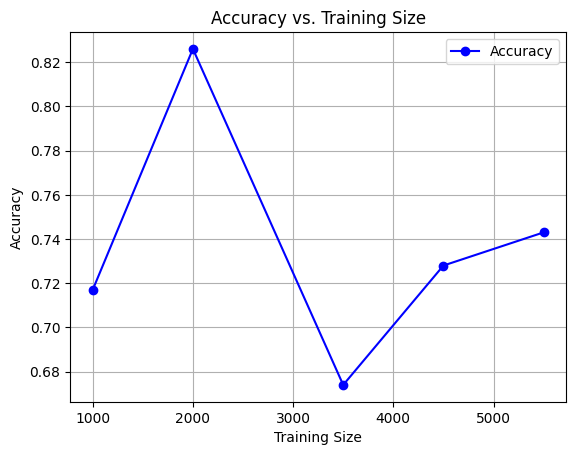

In [1]:
import matplotlib.pyplot as plt

# Define the data
training_sizes = [1000, 2000, 3500, 4500, 5500]
accuracy = [0.717, 0.826, 0.674, 0.728, 0.743]
validation_loss = [0.5667, 0.493, 0.606, 0.593, 0.578]

# Create a line graph for accuracy
plt.plot(training_sizes, accuracy, marker='o', label='Accuracy', linestyle='-', color='b')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Size')
plt.legend(loc='best')
plt.grid()

# Show the graph
plt.show()

CNN models built using Pre-trained Model:

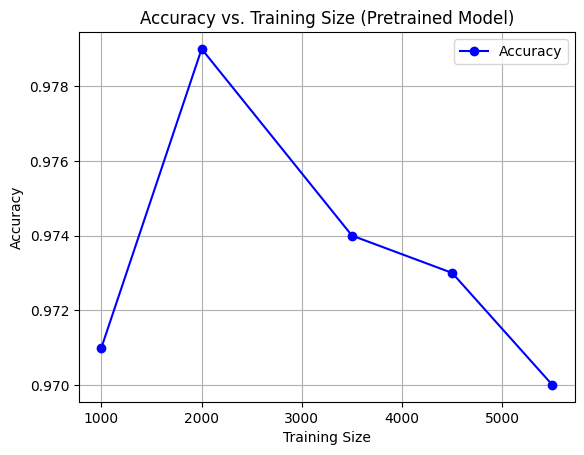

In [2]:
import matplotlib.pyplot as plt

# Define the data
training_sizes = [1000, 2000, 3500, 4500, 5500]
accuracy = [0.971, 0.979, 0.974, 0.973, 0.970]
validation_loss = [5.618, 1.628, 5.388, 3.625, 6.264]

# Create a line graph for accuracy
plt.plot(training_sizes, accuracy, marker='o', label='Accuracy', linestyle='-', color='b')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Size (Pretrained Model)')
plt.legend(loc='best')
plt.grid()

# Show the graph
plt.show()

